In [1]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines

In [29]:
with open('covid_data.p','rb') as f:
    data = pickle.load(f)

In [30]:
cols = ['state_code','fips_code','date','pop_total','p_c_i','deaths_cdc','amount_land',
       'retail_and_recreation_percent_change_from_baseline_goog_cnty',
       'workplaces_percent_change_from_baseline_goog_cnty']
df = data[cols].dropna()

In [31]:
df.loc[:,'retail_and_recreation_percent_change_from_baseline_goog_cnty'] = df["retail_and_recreation_percent_change_from_baseline_goog_cnty"].astype(float)
df.loc[:,'workplaces_percent_change_from_baseline_goog_cnty'] = df["workplaces_percent_change_from_baseline_goog_cnty"].astype(float)

In [32]:
df['mobility_change_cnty'] = df[
    ['date','retail_and_recreation_percent_change_from_baseline_goog_cnty','workplaces_percent_change_from_baseline_goog_cnty']
].mean(axis=1).rolling(window=7).mean()

In [33]:
df = df.drop(columns=['retail_and_recreation_percent_change_from_baseline_goog_cnty',
                 'workplaces_percent_change_from_baseline_goog_cnty'])

In [34]:
df['pop_density'] = df['pop_total'] / df['amount_land']
df['deaths_per_100k'] = df['deaths_cdc'] / df['pop_total'] * 100000
df['fips_color'] = df['fips_code'].astype(int)
df['death_diff'] = df['deaths_cdc'].diff()

In [41]:
df = df[df['state_code'] == 'NJ']
#df = df[df['deaths_cdc'] > 10]

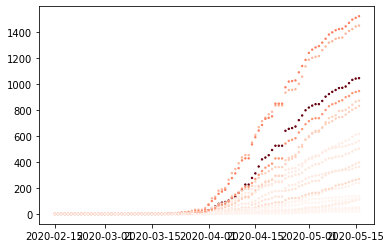

In [42]:
plt.scatter(df['date'], df['deaths_cdc'], c=df['pop_density'], s=2, cmap='Reds')

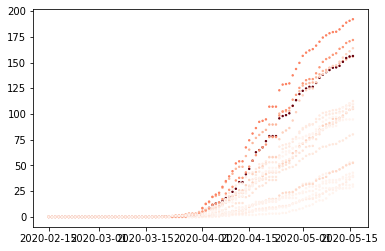

In [43]:
plt.scatter(df['date'], df['deaths_per_100k'], c=df['pop_density'], s=2, cmap='Reds')

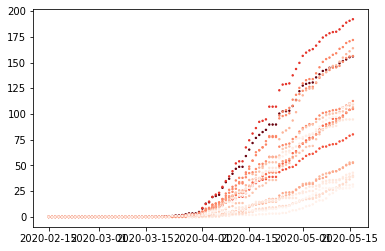

In [44]:
plt.scatter(df['date'], df['deaths_per_100k'], c=df['p_c_i'], s=2, cmap='Reds')

In [45]:
df[df['date'] == '2020-05-11'].head()

,state_code,fips_code,date,pop_total,p_c_i,deaths_cdc,amount_land,mobility_change_cnty,pop_density,deaths_per_100k,fips_color,death_diff
227828,NJ,34001,2020-05-11,274026.0,5446481.0,77.0,1.438983e+09,-51.642857,0.000190,28.099523,34001,5.0
227967,NJ,34003,2020-05-11,930310.0,35231548.0,1358.0,6.028483e+08,-55.714286,0.001543,145.972848,34003,3.0
228086,NJ,34005,2020-05-11,450236.0,10349202.0,200.0,2.069166e+09,-47.428571,0.000218,44.421148,34005,2.0
228215,NJ,34007,2020-05-11,511145.0,11889536.0,227.0,5.732872e+08,-43.142857,0.000892,44.410099,34007,2.0
228327,NJ,34009,2020-05-11,95404.0,3457658.0,32.0,6.530049e+08,-28.714286,0.000146,33.541571,34009,0.0


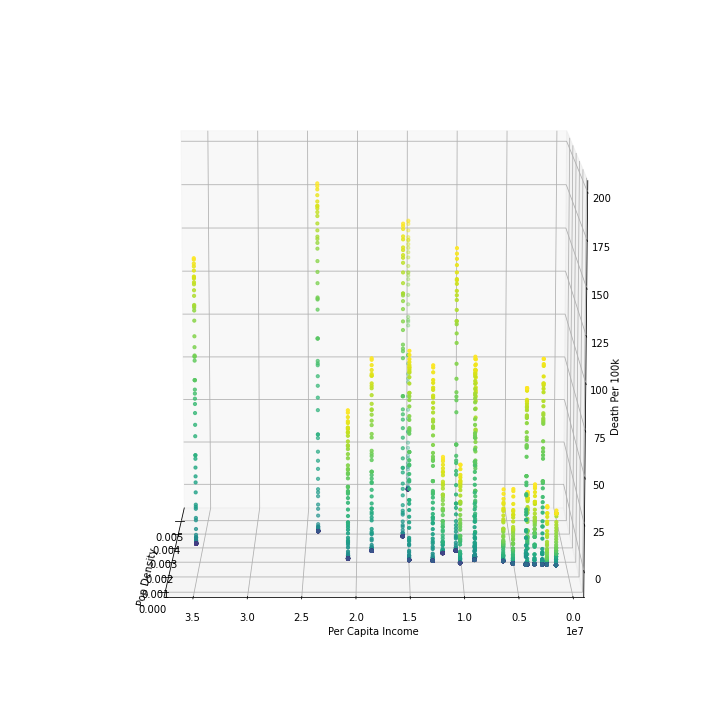

In [48]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
ax4 = fig.add_subplot(projection='3d')
ax4.set_title('')
ax4.set_xlabel('Pop Density')
ax4.set_ylabel('Per Capita Income')
ax4.set_zlabel('Death Per 100k')
ax4.scatter(df['pop_density'], df['p_c_i'],df['deaths_per_100k'],c=df['date'], s=10)
ax4.view_init(10,0+180)